In [71]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

In [72]:
def plot_digits(X, y, pred):
    X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

    plt.figure(figsize=(12, 9))

    colors = ['g' if y[i] == pred[i] else 'r' for i in range(len(y))]

    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=colors[i], fontdict={'weight':'bold', 'size':8})

    plt.xticks([])
    plt.yticks([])
    plt.show()

# KNN

In [73]:
def knn(X, Y, labels, k):
    dists =  - 2*Y.dot(X.T) + np.sum(Y**2, axis=1)[:, np.newaxis] + np.sum(X**2, axis=1) 
    closest = np.argsort(dists, axis=1)[:, :k]
    return mode(labels[closest], axis=1)[0].ravel()

def test(X, Y, plot=True):

    train_size = 500
    test_size = N - train_size
    for k in range(1, 11, 2):
            X_train = X[:train_size]
            Y_train = Y[:train_size]
            
            X_test = X[train_size:]
            Y_test = Y[train_size:]
            Y_pred = knn(X_train, X_test, Y_train, k)
            
            acc = np.sum(Y_pred == Y_test)/test_size
            print("k = {}:\t {}%".format(k, acc))
            if plot:
                plot_digits(X_test, Y_test, Y_pred)

# Wczytanie danych

In [74]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
N, d = X.shape

# Czyste dane

In [75]:
test(X,y, False)

k = 1:	 0.9321511179645335%
k = 3:	 0.9275250578257518%
k = 5:	 0.9136468774094063%
k = 7:	 0.9113338473400154%
k = 9:	 0.9121048573631457%


# Rzut na dwie losowo wybrane osie

k = 1:	 0.2235929067077872%


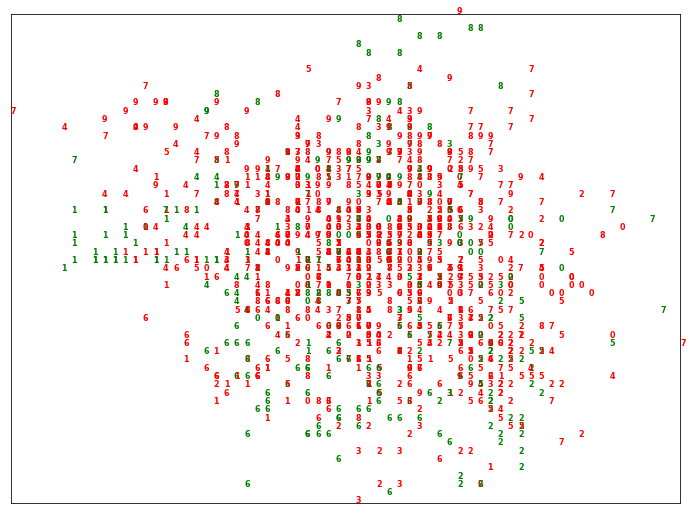

k = 3:	 0.23670007710100233%


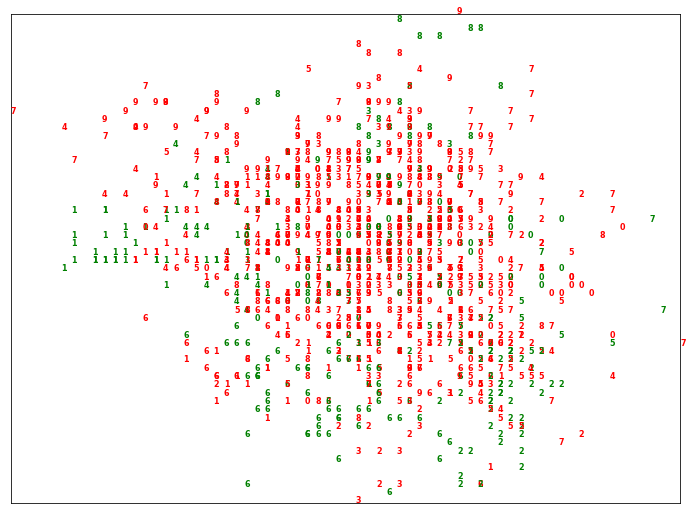

k = 5:	 0.2459521973785659%


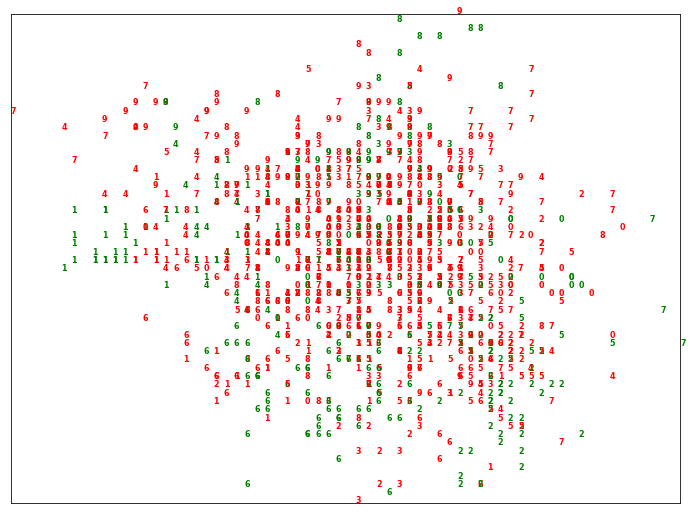

k = 7:	 0.24209714726291442%


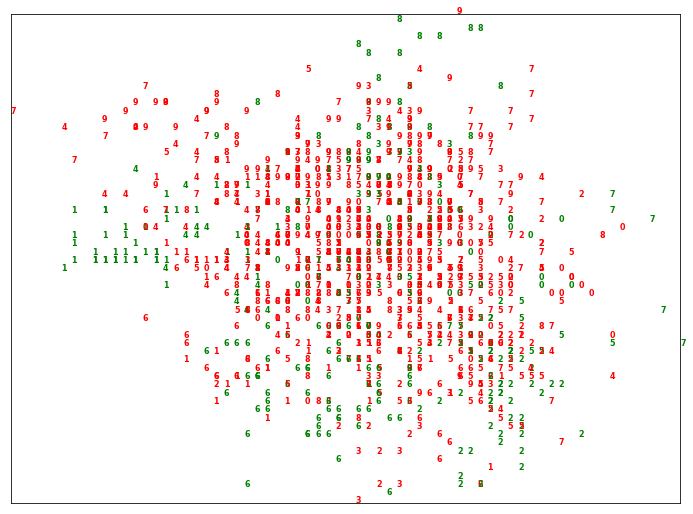

k = 9:	 0.2629144178874325%


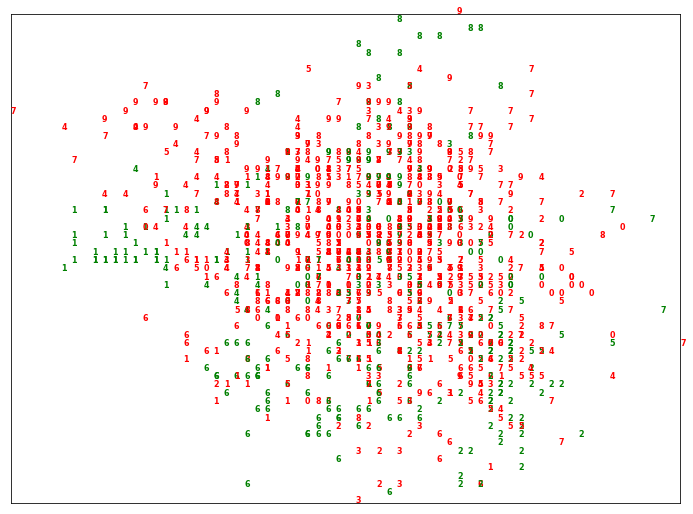

In [76]:
X_projected = random_projection.SparseRandomProjection(n_components=2).fit_transform(X)
test(X_projected, y)

# Principal Component Analysis (PCA)

k = 1:	 0.5497301464919044%


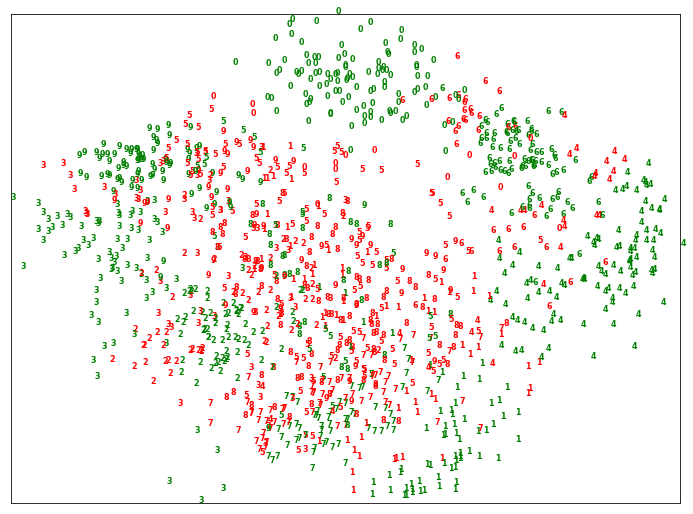

k = 3:	 0.5643793369313801%


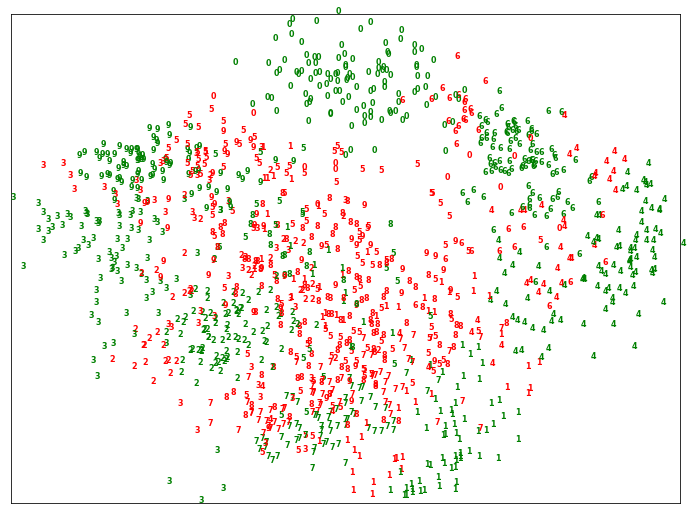

k = 5:	 0.5759444872783346%


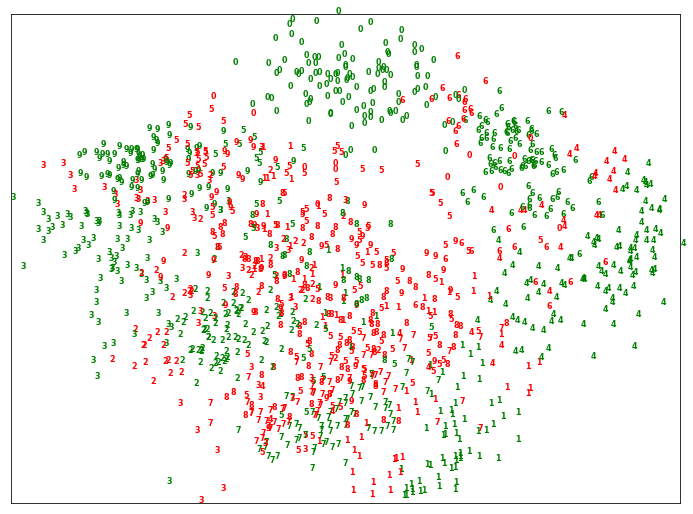

k = 7:	 0.5797995373939862%


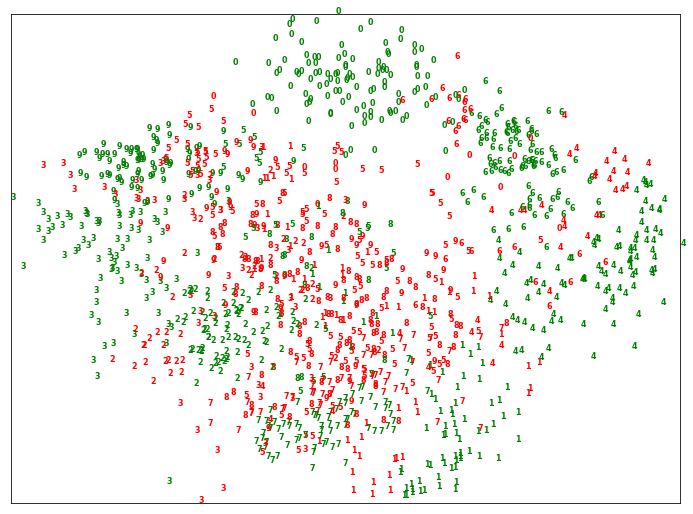

k = 9:	 0.5851966075558982%


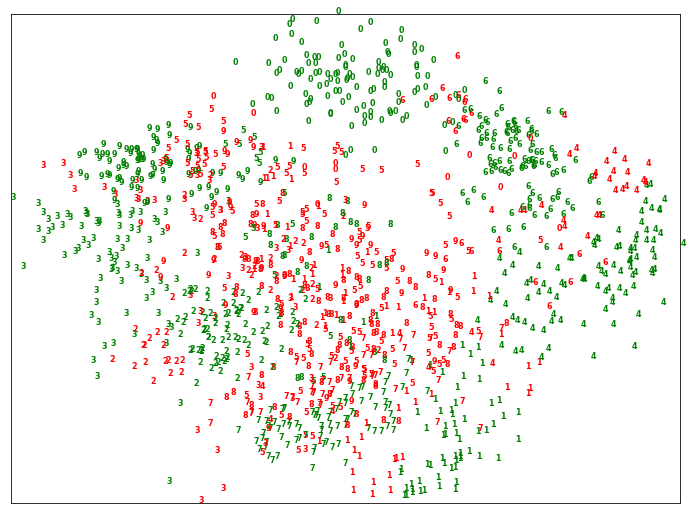

In [77]:
X_pca = decomposition.PCA(n_components=2, whiten=False).fit_transform(X)
test(X_pca, digits.target)

# Kernel Principal Component Analysis (KPCA)

k = 1:	 0.47417116422513494%


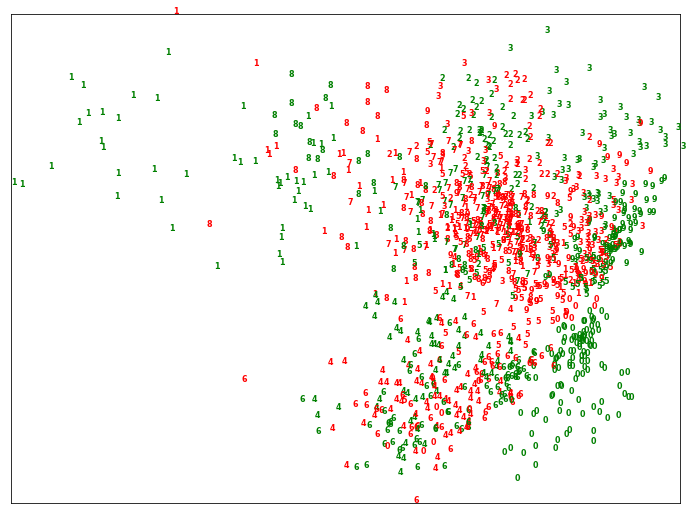

k = 3:	 0.45952197378565923%


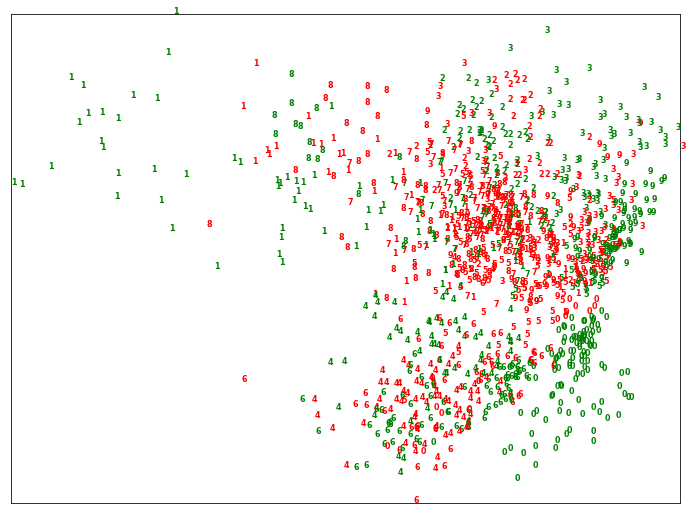

k = 5:	 0.47571318427139553%


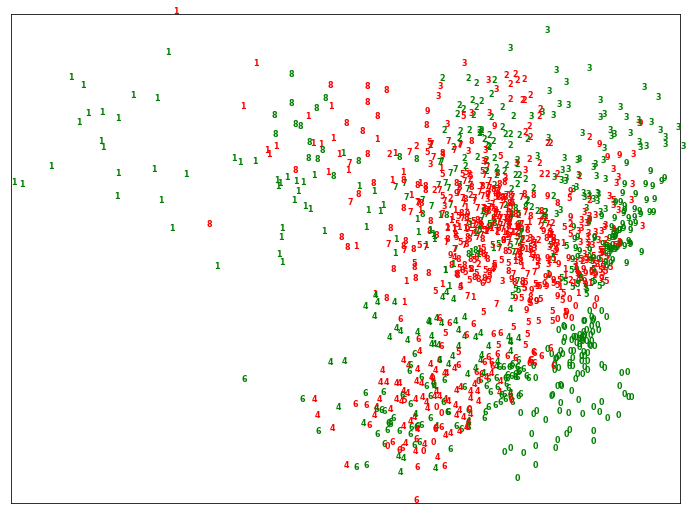

k = 7:	 0.48033924441017734%


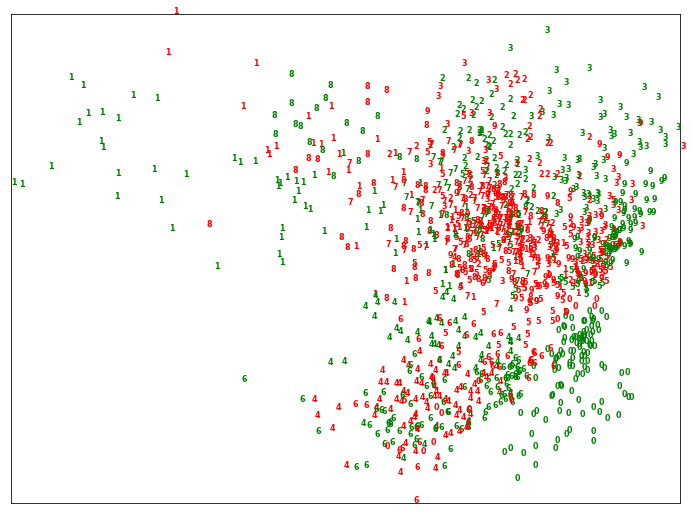

k = 9:	 0.49653045489591363%


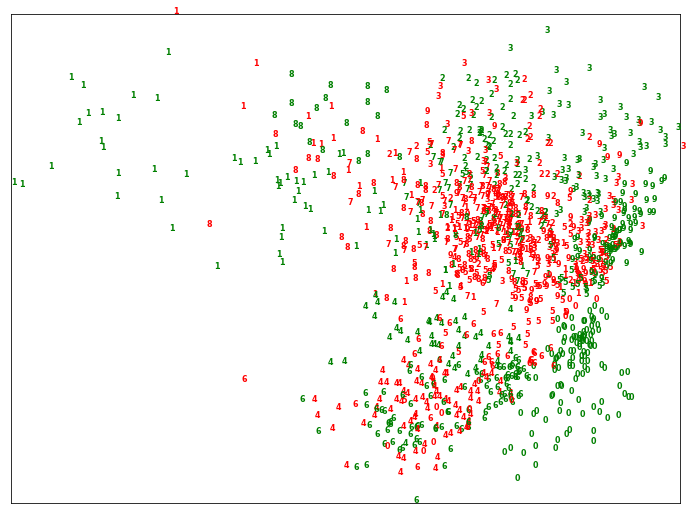

In [80]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="poly", degree=4, coef0=1, gamma=15).fit_transform(X)
test(X_kpca, digits.target)

# Isomap

k = 1:	 0.676946800308404%


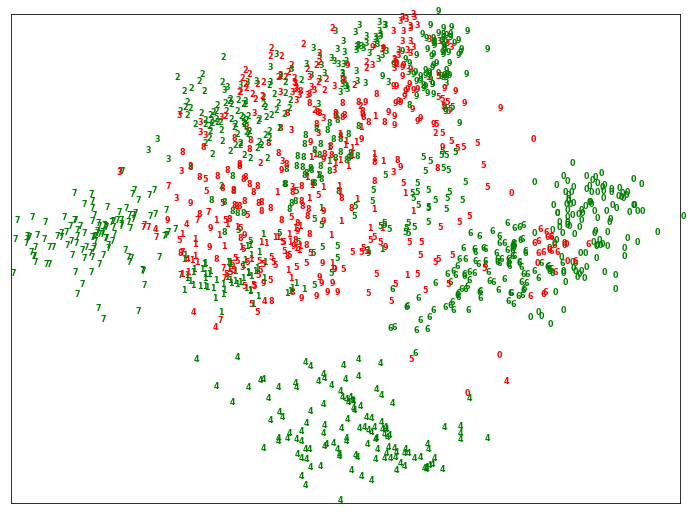

k = 3:	 0.6800308404009252%


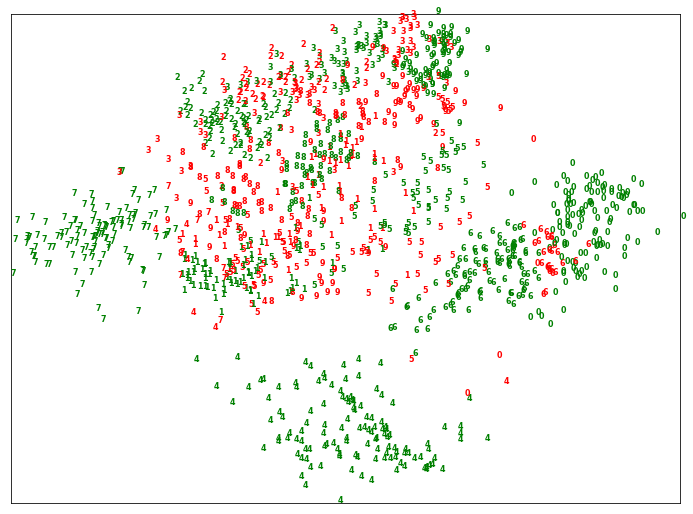

k = 5:	 0.7008481110254433%


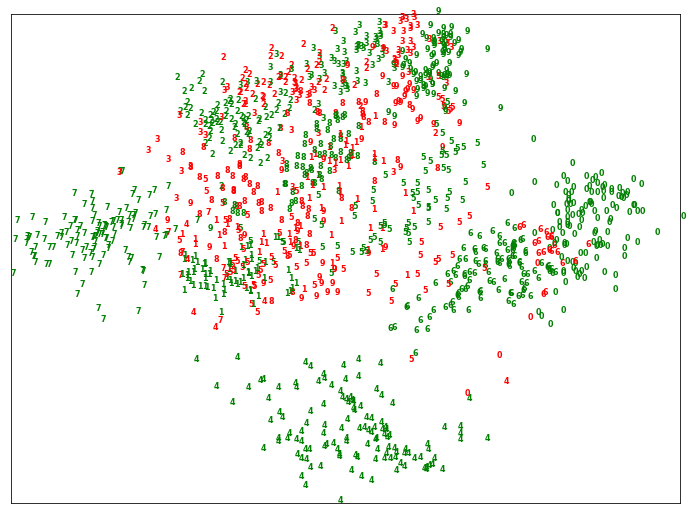

k = 7:	 0.7101002313030069%


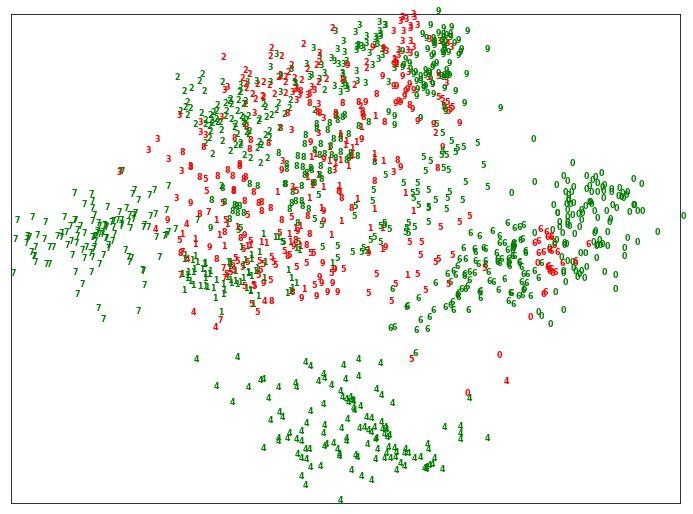

k = 9:	 0.7101002313030069%


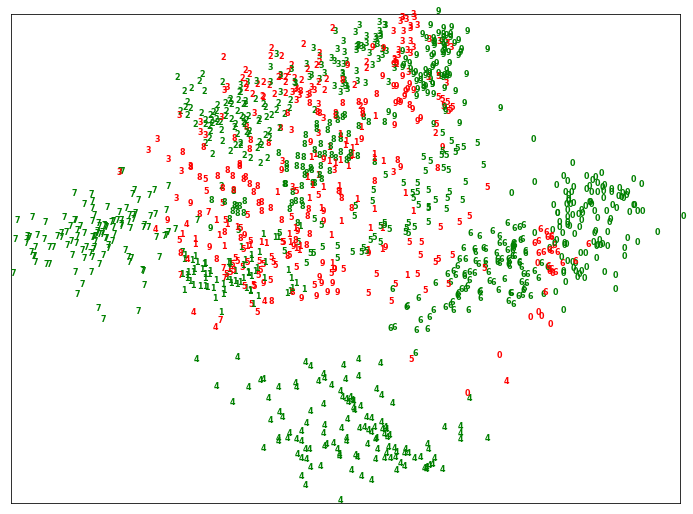

In [82]:
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
test(X_iso, digits.target)

# Locally Linear Embedding (LLE)

k = 1:	 0.3269082498072475%


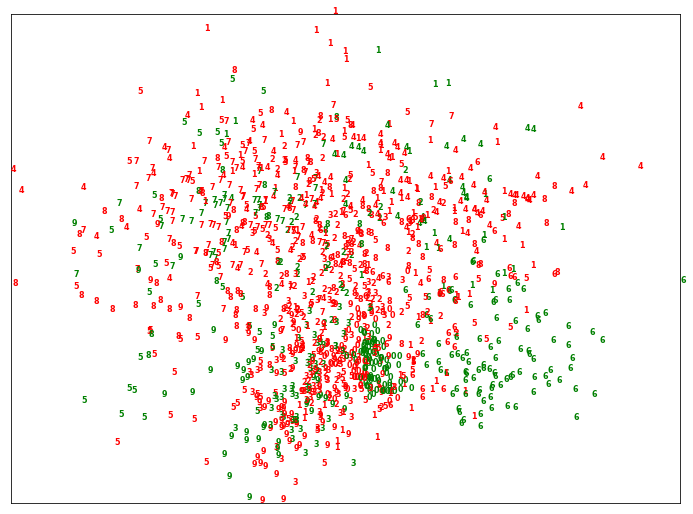

k = 3:	 0.36237471087124135%


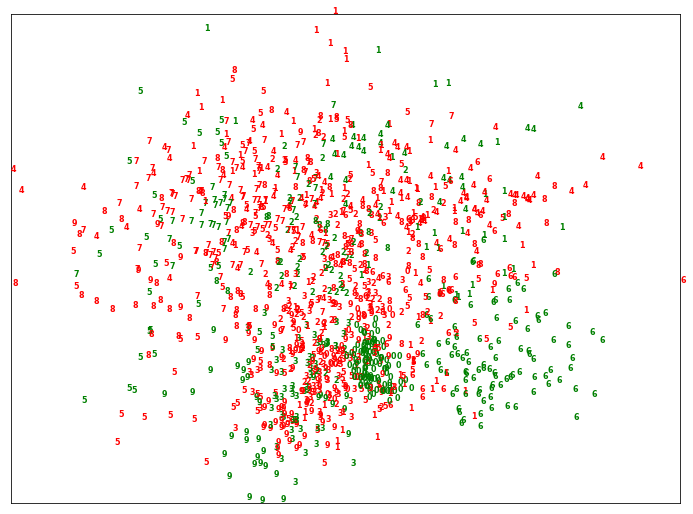

k = 5:	 0.38704703161141096%


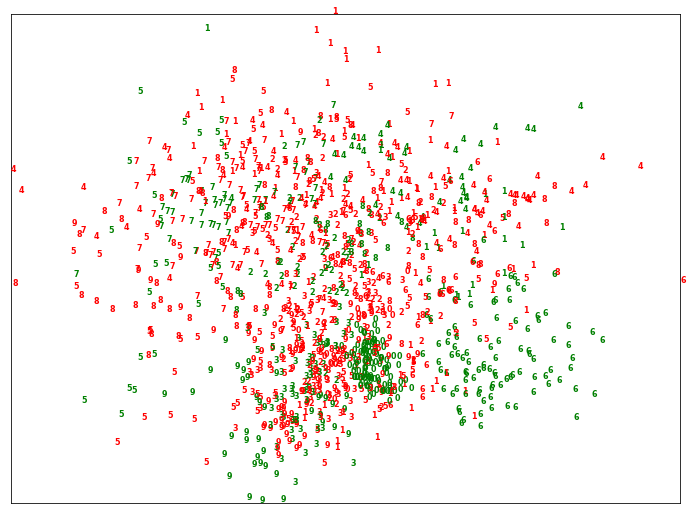

k = 7:	 0.4009252120277564%


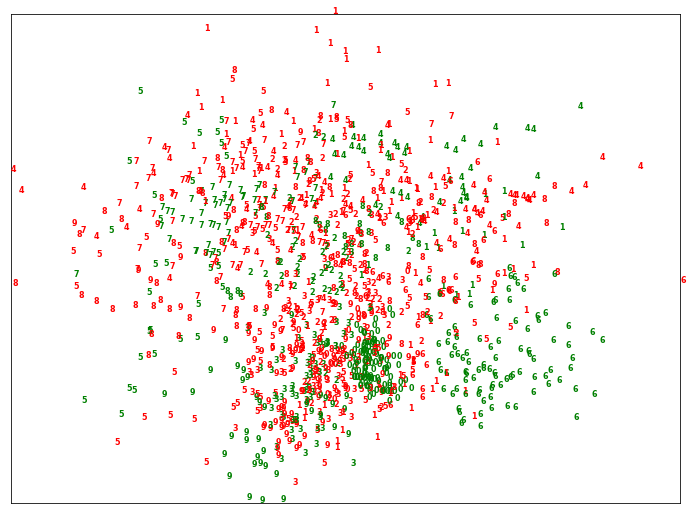

k = 9:	 0.40400925212027755%


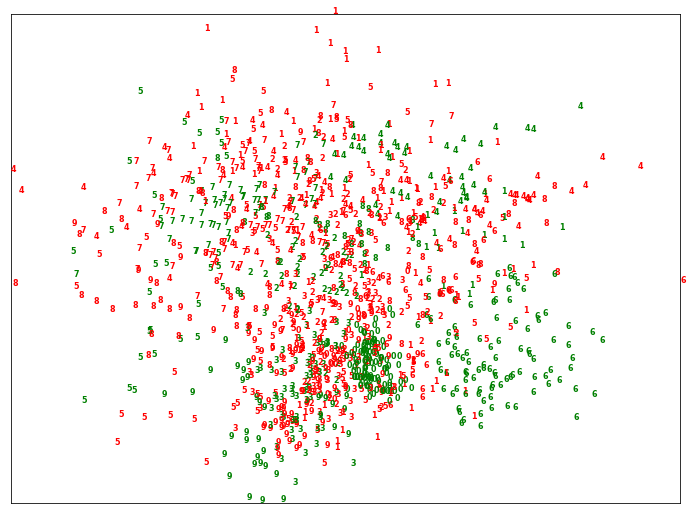

In [83]:
X_lle = manifold.LocallyLinearEmbedding(n_neighbors=60, reg=0.001, n_components=2).fit_transform(X)
test(X_lle, digits.target)

# Multidimensional Scaling (MDS)

k = 1:	 0.5227447956823439%


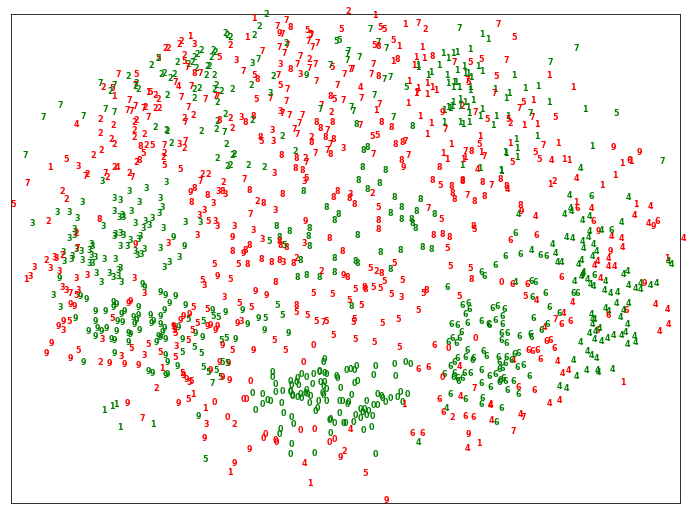

k = 3:	 0.5797995373939862%


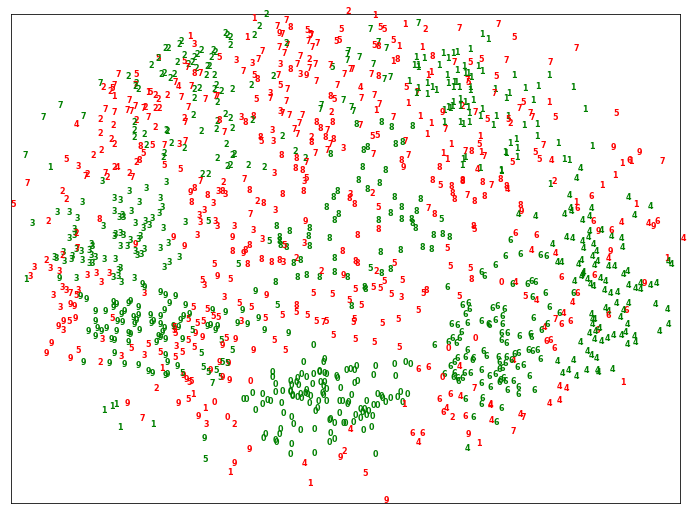

k = 5:	 0.5921356977640709%


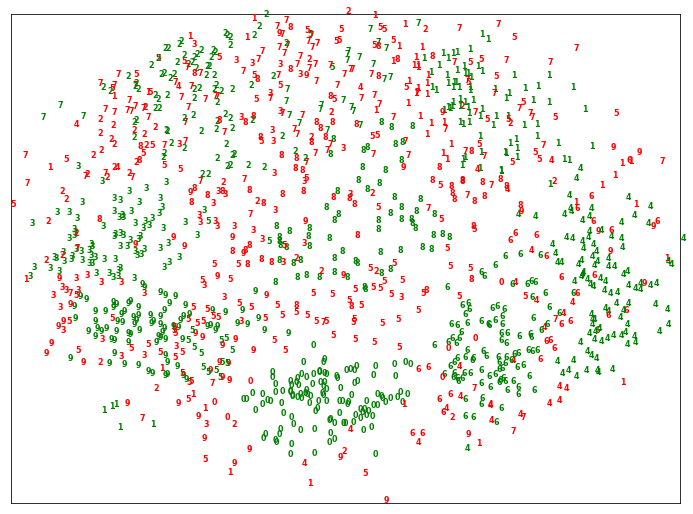

k = 7:	 0.6067848882035466%


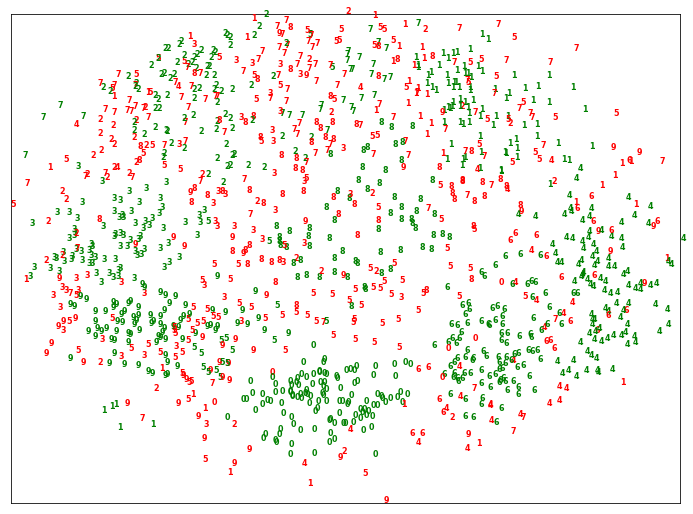

k = 9:	 0.6168080185042406%


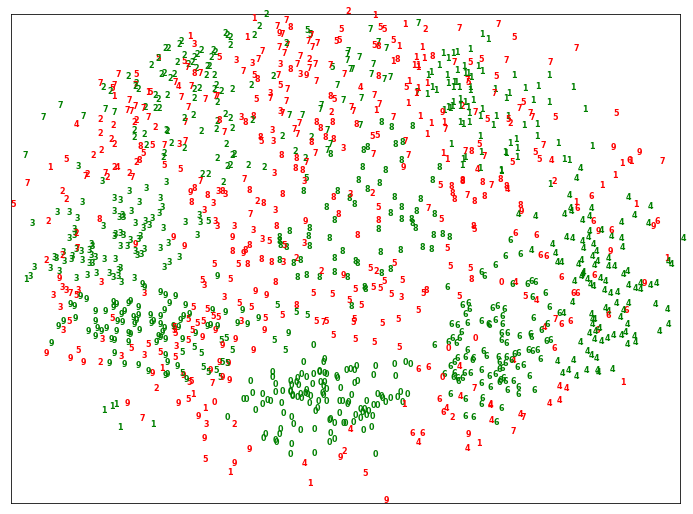

In [84]:
X_mds = manifold.MDS(n_components=2, metric=True, n_init=5, max_iter=100).fit_transform(X)
test(X_mds, digits.target)

# t-distributed Stochastic Neighbor Embedding (t-SNE)

k = 1:	 0.9753276792598303%


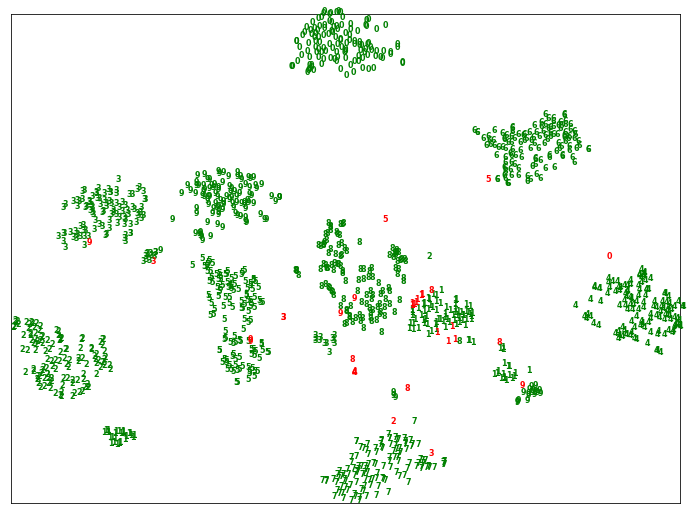

k = 3:	 0.9529683885890516%


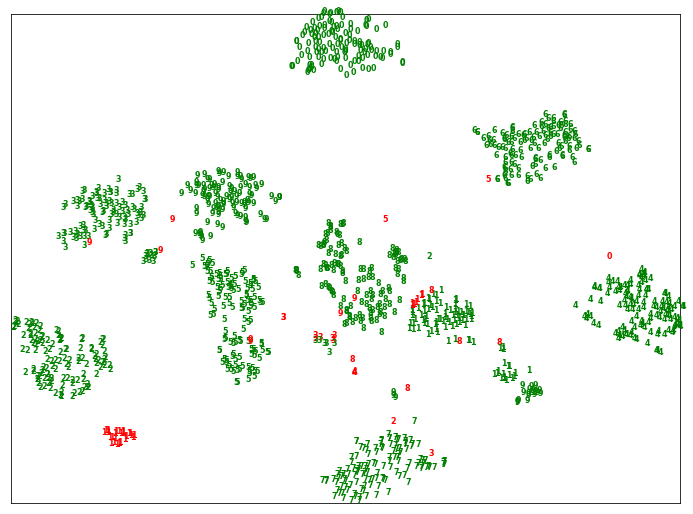

k = 5:	 0.9321511179645335%


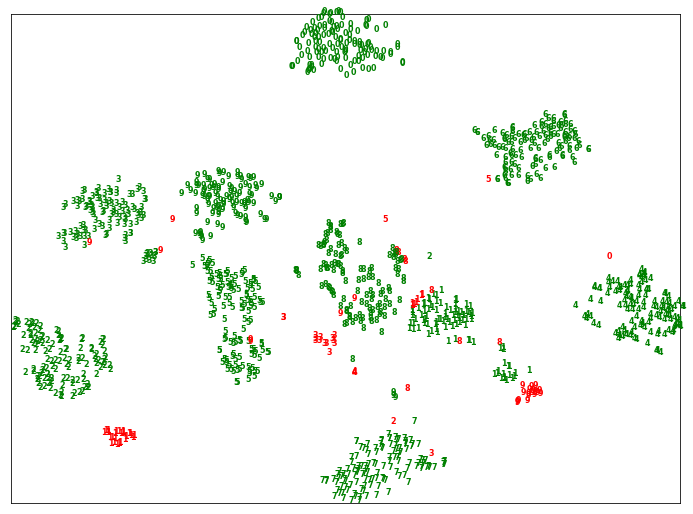

k = 7:	 0.9336931380107941%


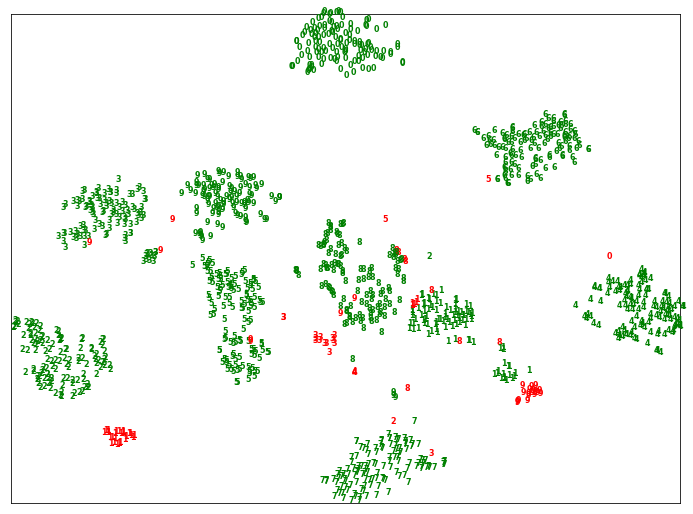

k = 9:	 0.9313801079414032%


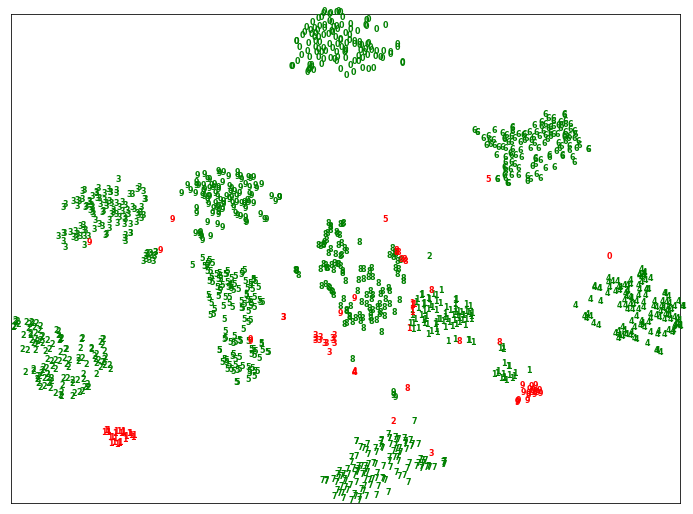

In [86]:
X_tsne = manifold.TSNE(n_components=2, perplexity=50, learning_rate=100, method="exact", init='pca').fit_transform(X)
test(X_tsne, digits.target)